# Language Model

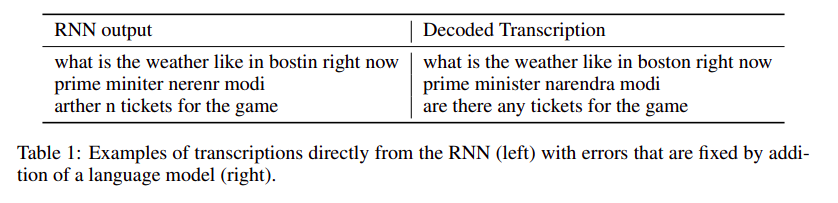
[source paper](https://arxiv.org/pdf/1412.5567.pdf)

 - Decoder is itself already a "language model"
 - Separate model can help correct ASR output
 - Trained on text instead of audio 
   - More Specialized

## Name Generator
### Code taken and modified from [pskrunner14](https://github.com/pskrunner14/char-level-rnn)

## Flag options, meanings, and defaults
| flag   | long flag       | datatype | description | default |
|--------|-----------------|----------|-------------|---------|
| f      | --filename      | PATH     | path for the training data file                    | [data/names] |
| rt     | --rnn-type      | TEXT     | type of RNN layer to use                           | [LSTM] |
| nl     |--num-layers     | INTEGER  | number of layers in RNN                            | [2] |
| dr     | --dropout       | FLOAT    | dropout value for RNN layers                       | [0.2] |
| es     | --emb-size      | INTEGER  | size of the each embedding                         | [64] |
| hs     | --hidden-size   | INTEGER  | number of hidden RNN units                         | [256] |
| n      | --num-epochs    | INTEGER  | number of epochs for training                      | [50] |
| bz     | --batch-size    | INTEGER  | number of samples per mini-batch                   | [32] |
| lr     | --learning-rate | FLOAT    | learning rate for the adam optimizer               | [0.0002] |
| se     | --save-every    | INTEGER  | epoch interval for saving the model                | [10] |
| ns     | --num-samples   | INTEGER  | number of samples to generate after epoch interval | [5] |
| sp     | --seed-phrase   | TEXT     | seed phrase to feed the RNN for sampling           | [SOS_TOKEN] |
| sa     | --sample-every  | INTEGER  | epoch interval for sampling new sequences          | [5] |
|        | --help          |          | Show this message and exit. ||  
note: some values may have been adjusted 

In [1]:
cd ..

/home/fran/documents/workshops/iu-hse-asr-workshop


In [2]:
# def train(filename, rnn_type, num_layers, dropout, emb_size, 
#           hidden_size, num_epochs, batch_size, learning_rate, 
#           num_samples, seed_phrase, sample_every):

In [3]:
# names demo values
filename = 'src/lm/data/names'
rnn_type = 'LSTM'
num_layers = 2
dropout = .2
emb_size = 64
hidden_size = 256
num_epochs = 10
batch_size = 32
learning_rate = 0.0002
num_samples = 5
seed_phrase = '[ASR OUTPUT]'
sample_every = 5

In [4]:
!python3 src/lm/train.py -f src/lm/data/names -n 10

Traceback (most recent call last):
  File "src/lm/train.py", line 4, in <module>
    import coloredlogs
ModuleNotFoundError: No module named 'coloredlogs'


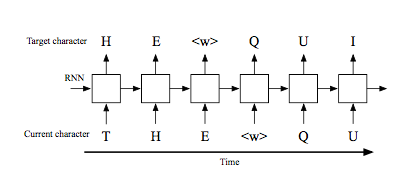
https://wiki.ubc.ca/Course:CPSC522/Character_Level_Language_Models_using_LSTM

### Our Version
This code has been edited to score words instead of generate them. Scores are the sum of the probability of each character in the word/phrase normalized by the length of the word/phrase. 

In [ ]:
from src.LM import LanguageModel
lm = LanguageModel()
lm_model, token_to_idx, idx_to_token = lm.train(filename = "data/transcripts.txt", num_layers=2, dropout=0.05, emb_size=100, hidden_size=200, num_epochs=20, batch_size=10, learning_rate=0.01)

/home/nils/.local/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Epoch[1/20]:   5%|▍         | 4/83 [00:00<00:02, 33.77it/s]

reading `data/transcripts.txt` for character sequences
number of unique tokens: 22
creating char-level RNN model
train tensors: torch.Size([831, 7])
val tensors: torch.Size([46, 7])
test tensors: torch.Size([47, 7])
training char-level RNN model


Epoch[8/20]:  48%|████▊     | 40/83 [00:01<00:01, 36.20it/s]

In [ ]:
lm.score(lm_model, token_to_idx, idx_to_token, "десять")
lm.score(lm_model, token_to_idx, idx_to_token, "дстятяь")

Some Python magic to run another notebook from 
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html

In [ ]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
#         print(nb_path)
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            print(nb_path)
            return nb_path

class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            code = ''
            for cell in nb.cells:
                if cell.cell_type == 'code' and not cell.source.startswith('train('):
    #                 print(cell.source)
                    # transform the input to executable Python
                    code += self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
#                     print(code)
#                     exec(code)
        finally:
            self.shell.user_ns = save_user_ns
        return code

In [ ]:
notebook = NotebookLoader()
exec(notebook.load_module('notebooks/Acoustic_Model'))

Now we replace the old CTCDecoder with ours. We edit it to use the LM for better prediction.

In [ ]:
import numpy as np
import math
import collections
try: 
    del CTCDecoder # get rid of the imported one
except NameError:
    pass
try: 
    del predict # get rid of the imported one
except NameError:
    pass

# brand new and improved Decoder
class CTCDecoder:
    
    def __init__(self, alphabet):
        self.alphabet = alphabet
        self.NEG_INF = -float("inf")
    
    def make_new_beam(self):
        fn = lambda : (self.NEG_INF, self.NEG_INF)
        return collections.defaultdict(fn)
    
    def logsumexp(self, *args):
        """
        Stable log sum exp.
        """
        if all(a == self.NEG_INF for a in args):
                return self.NEG_INF
        a_max = max(args)
        lsp = math.log(sum(math.exp(a - a_max) for a in args))
        return a_max + lsp
    
    def decode(self, probs, beam_size=100, blank=0):
        """
        Performs inference for the given output probabilities.
    
        Arguments:
                probs: The output probabilities (e.g. post-softmax) for each
                    time step. Should be an array of shape (time x output dim).
                beam_size (int): Size of the beam to use during inference.
                blank (int): Index of the CTC blank label.
    
        Returns the output label sequence and the corresponding negative
        log-likelihood estimated by the decoder.
        """
        T, S = probs.shape
        probs = np.log(probs)
    
        # Elements in the beam are (prefix, (p_blank, p_no_blank))
        # Initialize the beam with the empty sequence, a probability of
        # 1 for ending in blank and zero for ending in non-blank
        # (in log space).
        beam = [(tuple(), (0.0, self.NEG_INF))]
    
        for t in range(T): # Loop over time
    
            # A default dictionary to store the next step candidates.
            next_beam = self.make_new_beam()
    
            for s in range(S): # Loop over vocab
                p = probs[t, s]
    
                # The variables p_b and p_nb are respectively the
                # probabilities for the prefix given that it ends in a
                # blank and does not end in a blank at this time step.
                for prefix, (p_b, p_nb) in beam: # Loop over beam
    
                    # If we propose a blank the prefix doesn't change.
                    # Only the probability of ending in blank gets updated.
                    if s == blank:
                        n_p_b, n_p_nb = next_beam[prefix]
                        n_p_b = self.logsumexp(n_p_b, p_b + p, p_nb + p)
                        next_beam[prefix] = (n_p_b, n_p_nb)
                        continue
    
                    # Extend the prefix by the new character s and add it to
                    # the beam. Only the probability of not ending in blank
                    # gets updated.
                    end_t = prefix[-1] if prefix else None
                    n_prefix = prefix + (s,)
                    n_p_b, n_p_nb = next_beam[n_prefix]
                    if s != end_t:
                        n_p_nb = self.logsumexp(n_p_nb, p_b + p, p_nb + p)
                    else:
                        # We don't include the previous probability of not ending
                        # in blank (p_nb) if s is repeated at the end. The CTC
                        # algorithm merges characters not separated by a blank.
                        n_p_nb = self.logsumexp(n_p_nb, p_b + p)
                        
                    # *NB* this would be a good place to include an LM score.
                    next_beam[n_prefix] = (n_p_b, n_p_nb)
    
                    # If s is repeated at the end we also update the unchanged
                    # prefix. This is the merging case.
                    if s == end_t:
                        n_p_b, n_p_nb = next_beam[prefix]
                        n_p_nb = self.logsumexp(n_p_nb, p_nb + p)
                        next_beam[prefix] = (n_p_b, n_p_nb)
    
            # Sort and trim the beam before moving on to the
            # next time-step.
            beam = sorted(next_beam.items(),
                            key=lambda x : self.logsumexp(*x[1]),
                            reverse=True)
            beam = beam[:beam_size]
#             print('Beam: ' + str(beam))
            
#         best = beam[0]
#         print('Best: ' + str(best))
        return [x[0] for x in beam]
    
# also have to overwrite predict so it uses our CTCDecoder
def predict(test_path, aud_path, alphabet_path, model_path, batch_size, maxlen, maxlent, device_id=0):
    with open(alphabet_path, 'r') as fo:
        alphabet = ['<pad>'] + fo.readlines()

    char2ind = {alphabet[i].replace('\n', ''):i for i in range(len(alphabet))}
    ind2char = {char2ind[key]:key for key in char2ind}

    ctc_decoder = CTCDecoder(alphabet)
    
    device = torch.device("cuda:"+str(device_id) if torch.cuda.is_available() else "cpu")
    model = Seq2Seq(alphabet_size=len(alphabet), batch_size=batch_size, maxlen=maxlen)
    model.load_state_dict(torch.load(os.path.join(model_path, "model_best.pth")))
    model = model.to(device)

    test_dataset = Data(test_path, aud_path, char2ind, [extract_feats, encode_trans], maxlen, maxlent)
    loader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    step = 0
    num_steps = len(loader)

    targets = []
    predicted = []
    
    print("Total number of examples: ", num_steps*batch_size)
    
    for batch in loader:
        step+=1
        print("Decoding step {}/{}...".format(step, num_steps))
        batch_WER = 0
        batch_CER = 0

        x = batch['aud'].to(device)
        t = batch['trans'].to(device)
        fmask = batch['fmask'].squeeze(1).to(device)
        tmask = batch['tmask'].squeeze(1).to(device)
        preds = model(x, t, fmask, device)
        preds = torch.transpose(preds, 0, 1)

        preds = preds.detach().cpu().numpy()
        t = t.detach().cpu().numpy()
 
        tmask = tmask.detach().cpu().numpy()
        for i, probs in enumerate(preds):
            pad_ind = int(np.sum(tmask[i]))
            probs = np.exp(probs[:pad_ind,])
            seqs = ctc_decoder.decode(probs, beam_size=5)
            
            lm_preds = []
            for seq in seqs:
                # turn the sequence back into text from the numerical representation
                seq = ''.join([ind2char[ind] for ind in seq])
                seq = collapse_fn(seq)
            
###############################adding the LM here##############################
                # get the LM score for the sequence
                lm_score = lm.score(lm_model, token_to_idx, idx_to_token, seq)
                print('Score for ' + seq + ': ' + str(lm_score))
                lm_preds.append((seq, lm_score))
            
            # fancy sorting to determine the best guess
            lm_preds = sorted(lm_preds, key=lambda x: x[1], reverse=True)
            print('Best prediction: ' + str(lm_preds[0][0]) + ' with probability: ' + str(lm_preds[0][1]))

###############################################################################

            pad_ind = int(np.sum(tmask[i]))
            target = t[i][:pad_ind]
            target = ''.join([ind2char[ind] for ind in target])
            targets.append(target)
            # changed this to use the lm prediction
            predicted.append(lm_preds[0][0])

    save_predictions(targets, predicted, model_path)

Finally, we run the prediction using our modified Decoder and predict function

In [ ]:
predict('data/test.tsv', 'data/ru/clips/', 'data/alphabet.txt', 'notebooks', 10, 1083, 20)

## Famous Language Models

| name | year | size (parameters) | creator |  
|------|------|-------------------|---------|
| BERT | 2018 | 110M | Google |
| GPT  | 2018 | 117M | OpenAI | 
| GPT-3 | 2020 | 175B | OpenAI |

Why might this be problematic? 